# The German Credit Risk Prediction Model

### Done By - VISHWAK BALAJI

**Problem statement:**
A dataset that records the credit risk of 1000 risk in German Bank Dataset is given.In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes.

**objective:** 
The first task is Plotting and EDA, then fitted a model Logistic Regression Model and checked Forward selection test. After that I Experimented on Decision Tree Model to check the accuracy score for it.

## 1.Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import pygraphs as pg
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import ensemble
from scipy.stats import randint
import statsmodels.api as stm
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from math import sqrt
 #like matplotlib
import plotly.offline as py
import plotly.graph_objs as go

## 2.Reading Dataset

In [2]:
data = "german_credit_data.csv"
directory = r"C:\Users\vishw\Videos\DATA SETS\german_cerdit project 2"

In [3]:
# Using the pygraphs package to print the data frame
credit = pg.DFrame(data,directory) 
credit.head()

Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  Risk  
0         6             radio/TV  good  
1        48             radio/TV   bad  
2        12            education  good  
3        42  furniture/equipment  good  
4        24                  car   bad

In [4]:
#Renaming the column names:

credit = credit.rename(columns={'Saving accounts':'Saving_accounts', 'Credit amount': 'Credit_amount',
                       'Checking account': 'Checking_account'})

In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving_accounts   817 non-null    object
 5   Checking_account  606 non-null    object
 6   Credit_amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [6]:
#checking the total no. of null values presents in the dataset
credit.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving_accounts     183
Checking_account    394
Credit_amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

## 3.Plotting the Dataset

   **Calling the pygraphs package to plot the histogram, boxplot and barplot.  Also we find, whether the variable is categorical or numerical. After that we plot histogram and boxplot for numerical(Continuous distribustion), then barplot for categorical(discrete distribustion).**

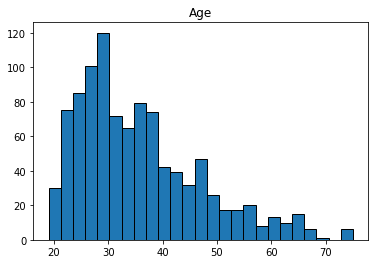

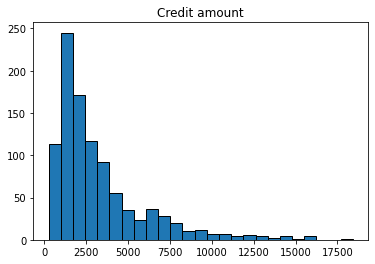

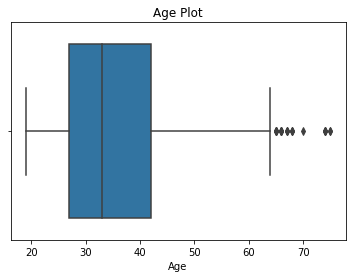

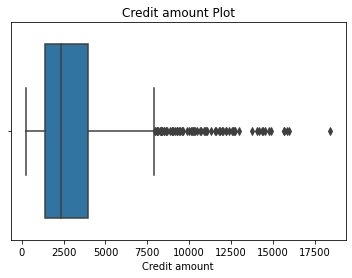

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



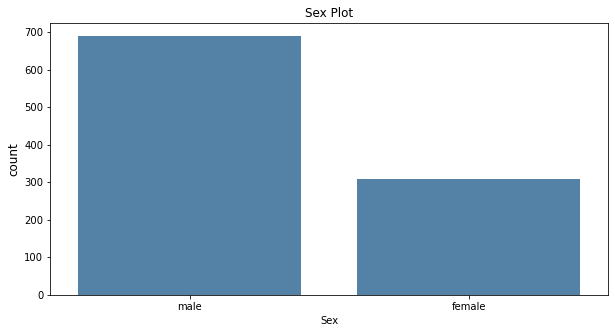

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



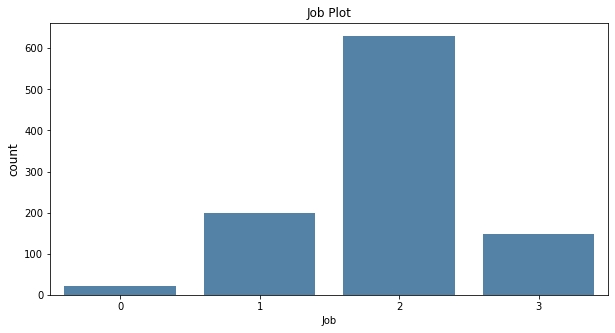

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



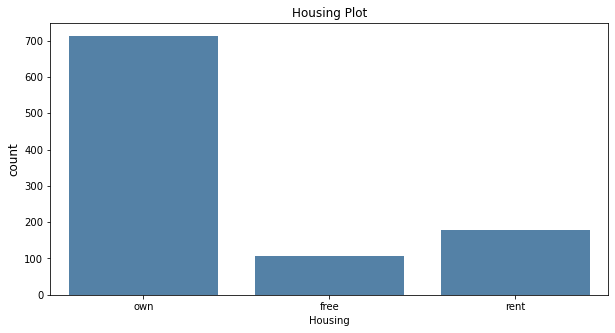

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



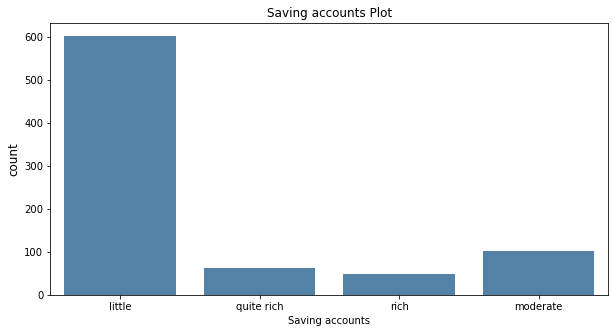

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



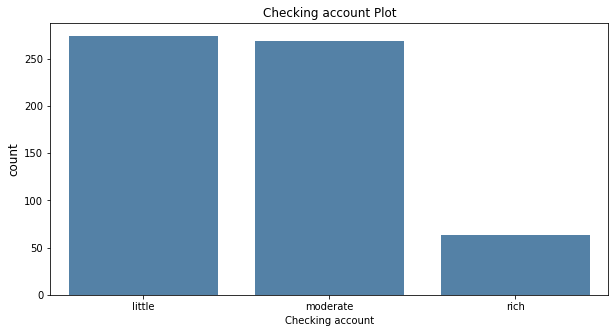

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



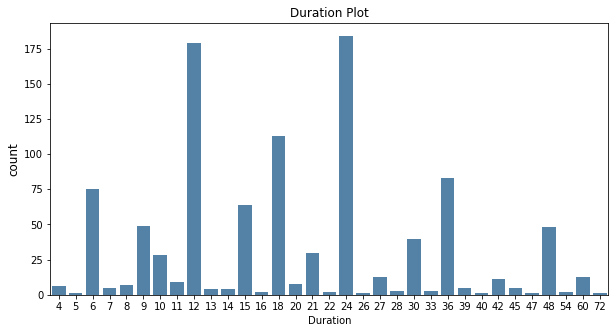

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



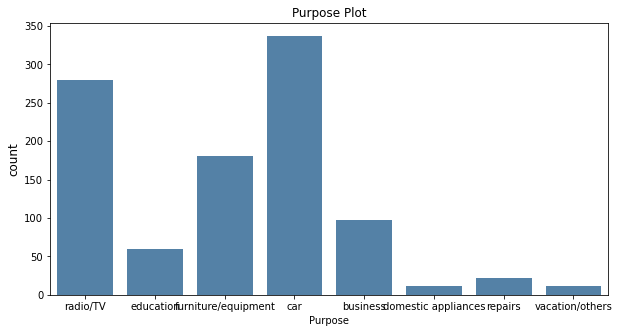

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



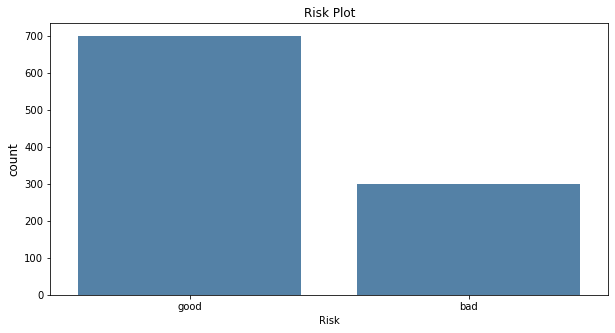

In [7]:
# using the package to plot the dataset
pg.graphs(data,variable = 0,directory=directory)

From the above graph shows the categorical variable and numerical variable. From this information, I am going to reserch further in EDA.

### Plotting the Comparison between Duration, Credit_amount and Risk(good and bad)

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



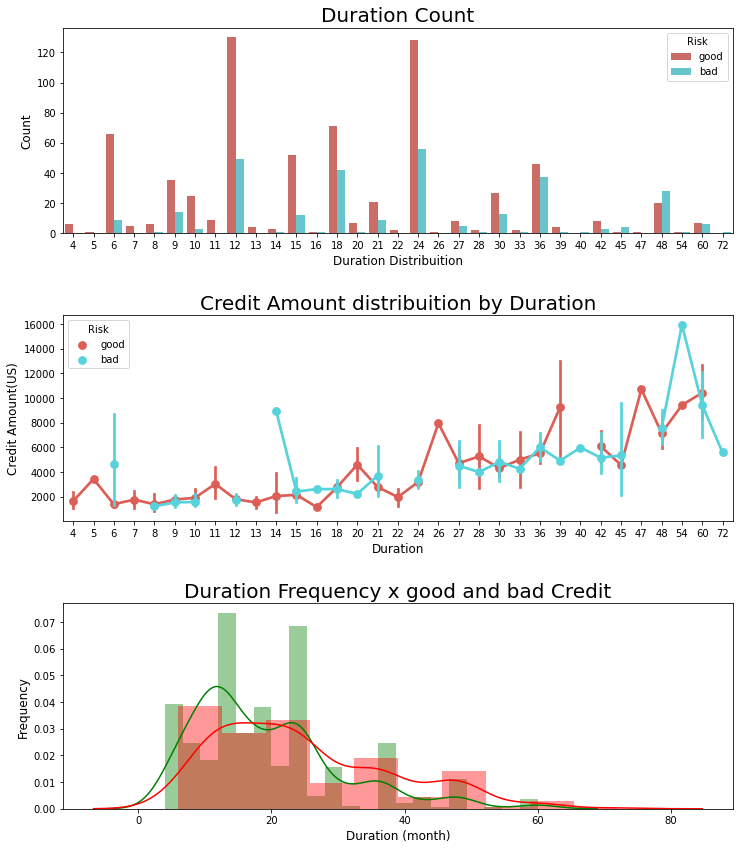

In [8]:
# Taking the good and bad from inside the Risk variable and storing its own:

cre_good = credit[credit["Risk"] == 'good']
cre_bad = credit[credit["Risk"] == 'bad']

# Plotting the duration 'counts' of Risk:

plt.figure(figsize = (12,14))

g= plt.subplot(311)
g = sns.countplot(x="Duration", data=credit, 
              palette="hls",  hue = "Risk")
g.set_xlabel("Duration Distribuition", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Duration Count", fontsize=20)

# Plotting the 'Credit amount distribution by Duration' of Risk:

g1 = plt.subplot(312)
g1 = sns.pointplot(x="Duration", y ="Credit_amount",data=credit,
                   hue="Risk", palette="hls")
g1.set_xlabel("Duration", fontsize=12)
g1.set_ylabel("Credit Amount(US)", fontsize=12)
g1.set_title("Credit Amount distribuition by Duration", fontsize=20)

# Plotting the 'Duration frquency' of Risk
g2 = plt.subplot(313)
g2 = sns.distplot(cre_good["Duration"], color='g')
g2 = sns.distplot(cre_bad["Duration"], color='r')
g2.set_xlabel("Duration (month)", fontsize=12)
g2.set_ylabel("Frequency", fontsize=12)
g2.set_title("Duration Frequency x good and bad Credit", fontsize=20)

plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 0.9)

plt.show()

## 4.EDA(Exploratory Data Analysis)

In [9]:
# describing the data
credit.describe()

Age          Job  Credit_amount     Duration
count  1000.000000  1000.000000    1000.000000  1000.000000
mean     35.546000     1.904000    3271.258000    20.903000
std      11.375469     0.653614    2822.736876    12.058814
min      19.000000     0.000000     250.000000     4.000000
25%      27.000000     2.000000    1365.500000    12.000000
50%      33.000000     2.000000    2319.500000    18.000000
75%      42.000000     2.000000    3972.250000    24.000000
max      75.000000     3.000000   18424.000000    72.000000

In [10]:
# Creating new variable, inspired from the age variable

interval = (0, 25, 35, 60,100)

criteria = ['Student', 'Young', 'Adult', 'Senior']
credit["Age_criteria"] = pd.cut(credit.Age, interval, labels=criteria)
credit.head()

Age     Sex  Job Housing Saving_accounts Checking_account  Credit_amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  Risk Age_criteria  
0         6             radio/TV  good       Senior  
1        48             radio/TV   bad      Student  
2        12            education  good        Adult  
3        42  furniture/equipment  good        Adult  
4        24                  car   bad        Adult

In [11]:
# Taking the good and bad from inside the Risk variable and storing its own:

cre_good = credit[credit["Risk"] == 'good']
cre_bad = credit[credit["Risk"] == 'bad']


# creating a categorical variable to handle with the age variable:

way0 = go.Box(
    y=cre_good["Credit_amount"],
    x=cre_good["Age_criteria"],
    name='Good credit',
    marker=dict(
        color='#3D9970'
    )
)

way1 = go.Box(
    y=cre_bad['Credit_amount'],
    x=cre_bad['Age_criteria'],
    name='Bad credit',
    marker=dict(
        color='#FF4136'
    )
)
    
data = [way0, way1]

layout = go.Layout(
    yaxis=dict(
        title='Credit Amount (US Dollar)',
        zeroline=False
    ),
    xaxis=dict(
        title='Age Categorical'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-criteria')

In [12]:
# comparing the two vriable and seeing its diffrences:

date_init = ["Purpose", 'Sex']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(credit[date_init[0]], credit[date_init[1]]).style.background_gradient(cmap = cm)

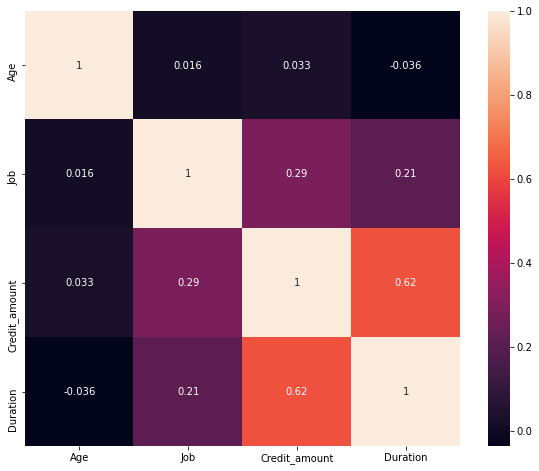

In [13]:
# Seeing the Correlation chart and plotting in the heat map:

correlation = credit.corr()
# plotting it in heat map
plt.subplots(figsize=(10,8))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True,
            annot_kws={'size': 10},square=True)
plt.show()

## 5.Fitting a Logistic Regression

In [14]:
# LR model:

X=credit[['Age','Job','Credit_amount','Duration']]
y=credit['Risk']
#Splitting the data set into test and train for the train and validation purpose:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 7)

# Standardizing the target variables :
std = StandardScaler()                    #standardizing the function
X_train_std = std.fit_transform(X_train)  #Standardizing the train data
X_test_std = std.transform(X_test)        #Standardizing the test data 
lr = LogisticRegression()            #Linear regression function assigned to lr
lr.fit(X_train_std,y_train)        #fitting the model
y_pred = lr.predict(X_test_std)    #predicted value

# confustion matrix
cm = confusion_matrix(y_test, y_pred)
print("The Confusion Matrix value is\n",cm)
As = accuracy_score(y_test, y_pred)
print("The Accuracy Score Value is",As)

The Confusion Matrix value is
 [[ 10  73]
 [  9 208]]
The Accuracy Score Value is 0.7266666666666667


In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         bad       0.53      0.12      0.20        83
        good       0.74      0.96      0.84       217

    accuracy                           0.73       300
   macro avg       0.63      0.54      0.52       300
weighted avg       0.68      0.73      0.66       300



## 6.Forward Selection Method

In [16]:
X=credit[['Age','Job','Credit_amount','Duration']]
y=credit['Risk']

#Splitting the data set into test and train for the train and validation purpose:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 33)

#Forward selection:
sfs=SFS(LogisticRegression(),
        k_features=4,
        forward=True,
        floating=False,
        verbose=2,
        cv=5,
        n_jobs=1).fit(x_train,y_train)

# Printing the accuracy and the features which is obtained by forward selection:
print("Accuracy : ",sfs.k_score_)
print("Feautures selected : ",sfs.k_feature_names_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished

[2021-07-10 22:30:14] Features: 1/4 -- score: 0.7142857142857143[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished

[2021-07-10 22:30:14] Features: 2/4 -- score: 0.7142857142857143[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Accuracy :  0.71
Feautures selected :  ('Age', 'Job', 'Credit_amount', 'Duration')


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s finished

[2021-07-10 22:30:14] Features: 3/4 -- score: 0.7100000000000001[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished

[2021-07-10 22:30:14] Features: 4/4 -- score: 0.71

## 7.Fitting Decision Tree

In [17]:
# DT model:

X=credit[['Age','Job','Credit_amount','Duration']]
y=credit['Risk']
#Splitting the data set into test and train for the train and validation purpose:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 7)

#loading the decision tree alogorithm
dt = DecisionTreeClassifier(max_depth = 7,min_samples_leaf =10) 
dt.fit(X_train,y_train)    #Fitting the model
y_pred = dt.predict(X_test) #Predicting the y value's

# confustion matrix
cm = confusion_matrix(y_test, y_pred)
print("The Confusion Matrix value is\n",cm)
As = accuracy_score(y_test, y_pred)
print("The Accuracy Score Value is",As)

The Confusion Matrix value is
 [[ 26  57]
 [ 39 178]]
The Accuracy Score Value is 0.68


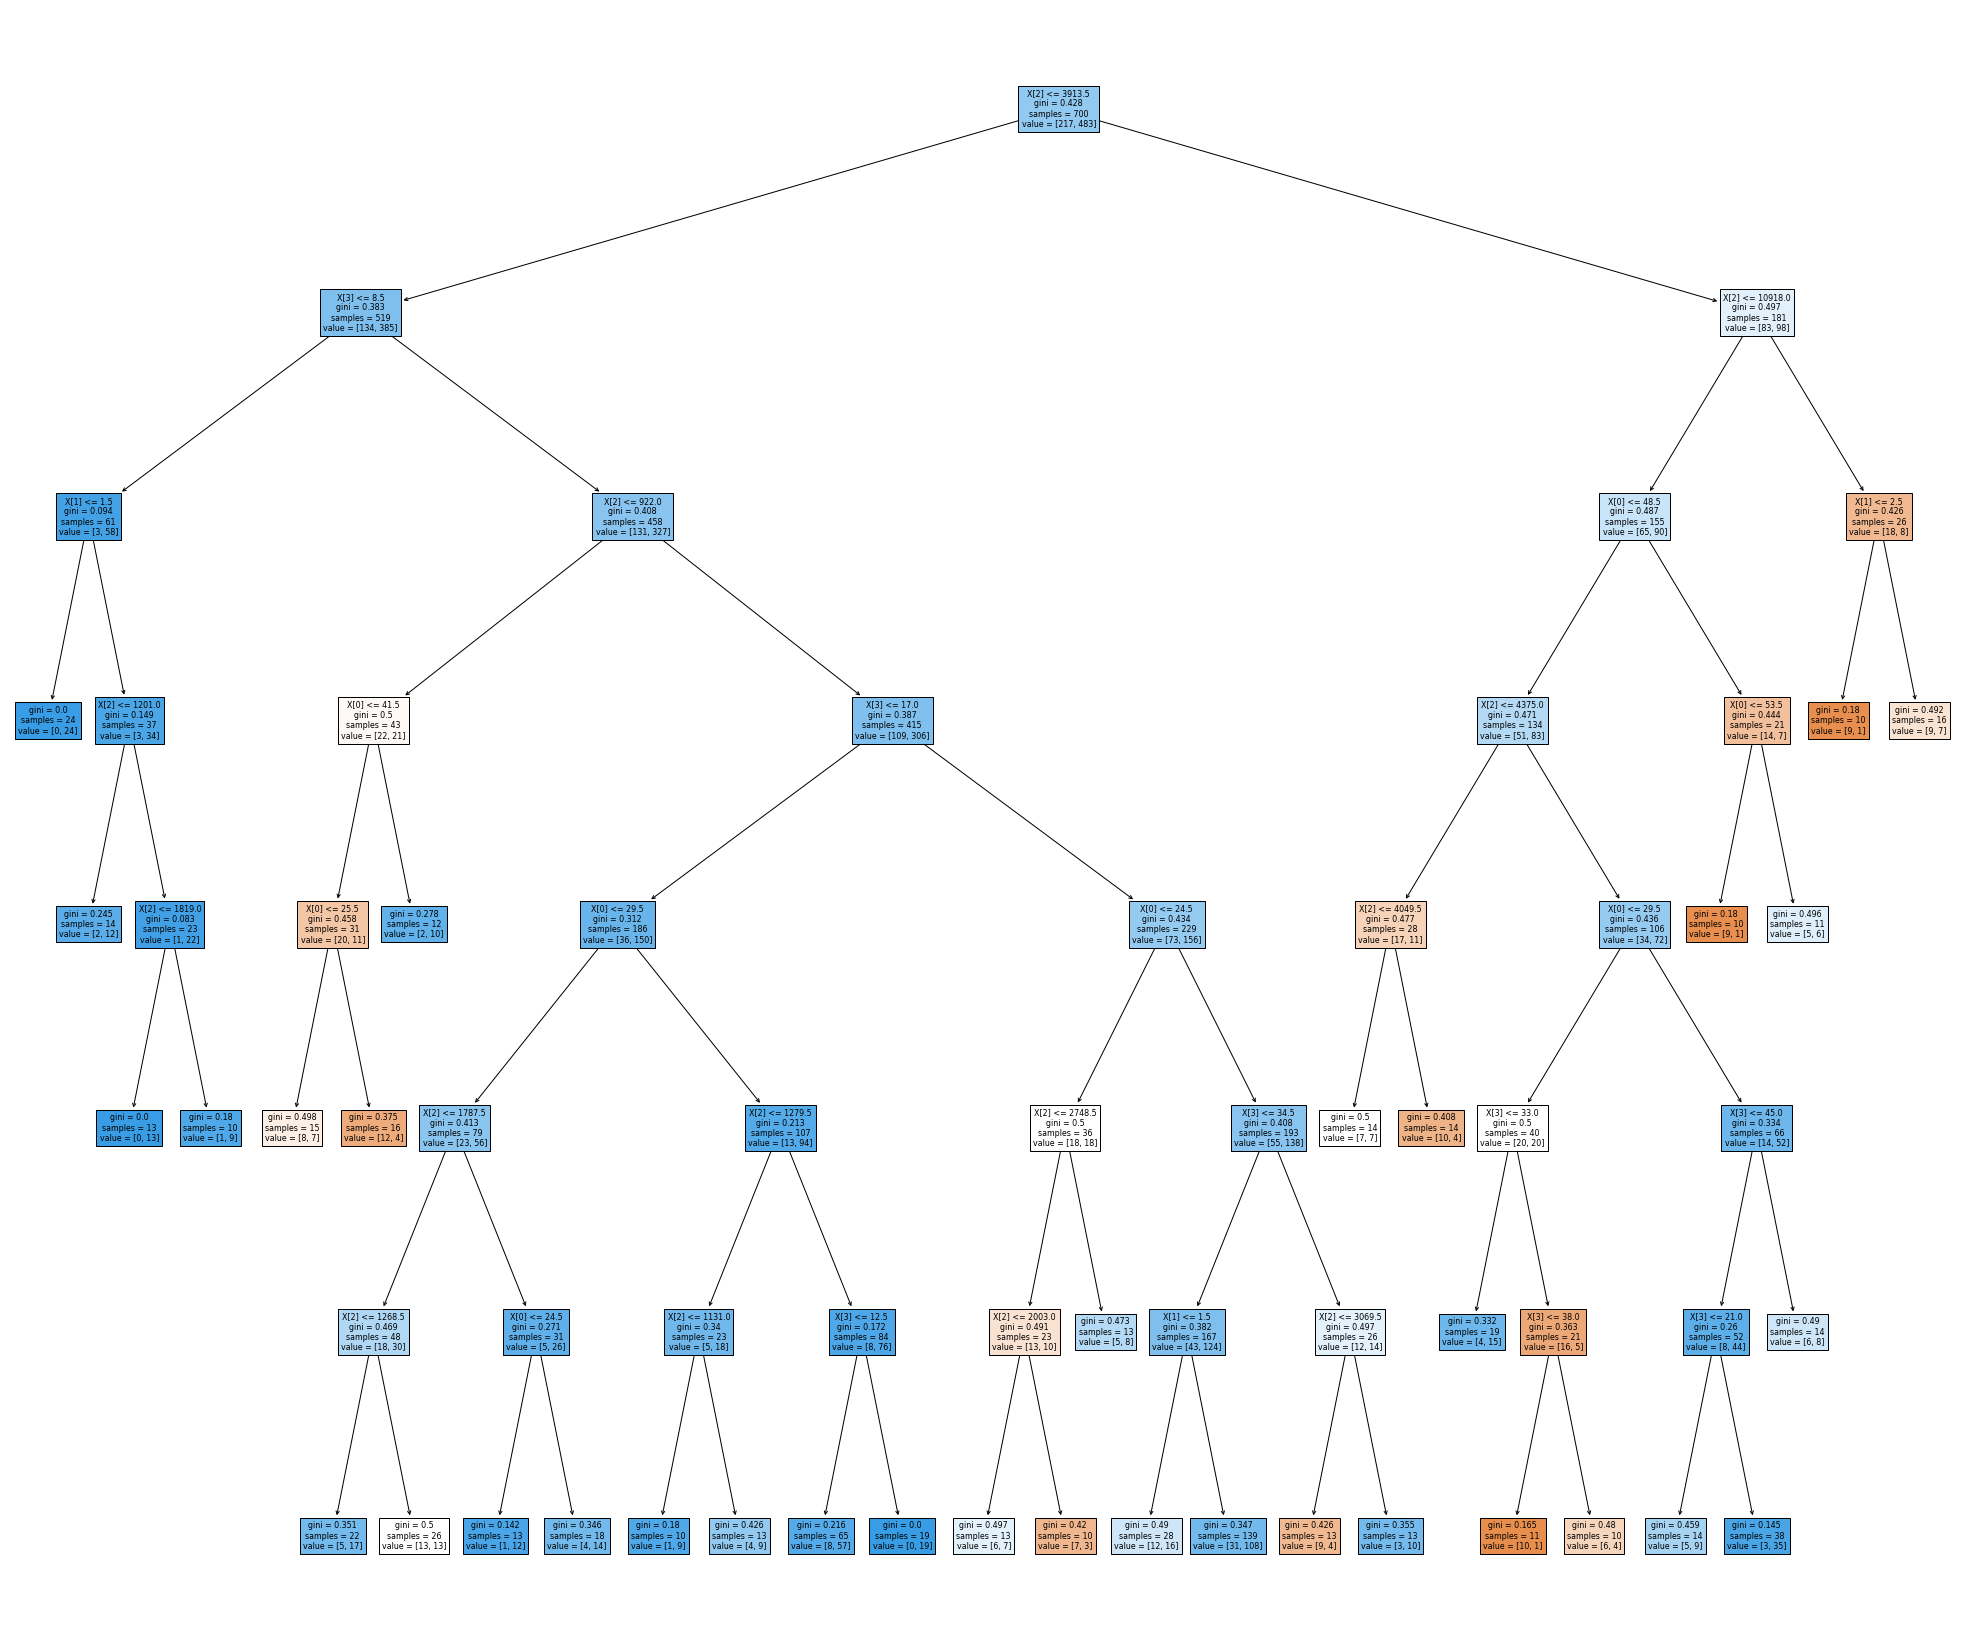

In [18]:
from sklearn import tree

# decision tree diagram:

fig = plt.figure(figsize=(35,30))
_ = tree.plot_tree(dt,
                   filled=True)

### Hyperparameter (Grid search CV) 

In [19]:
# Hyperparameter param distance
param_dist = {    
    "max_depth": [3, None],    
    "max_features": randint(1, 9),   
    "min_samples_leaf": randint(1, 9),   
    'criterion' : ['gini','entropy']     
}
# parameter grid
param_grid = { "min_samples_split":[1,2,3,4,5,6,7,None],"min_samples_leaf":[1,2,3]}  
# parameter search
g_search = GridSearchCV(estimator = dt, param_grid = param_grid,    
                                     cv = 5, n_jobs = 1, verbose = 0, return_train_score=True)
# fitting the xtrain and ytrain in grid searchcv
g_search.fit(X_train,y_train) 

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "D:\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=7, min_samples_leaf=10),
             n_jobs=1,
             param_grid={'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, None]},
             return_train_score=True)

In [20]:
# taking the best fit out
print("Best Score:",g_search.best_score_) 
print("\n")
# taking the best estimator out
print(g_search.best_estimator_.get_params())  

Best Score: 0.6757142857142857


{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [21]:
print(confusion_matrix(y_test,y_pred))

[[ 26  57]
 [ 39 178]]


In [22]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         bad       0.40      0.31      0.35        83
        good       0.76      0.82      0.79       217

    accuracy                           0.68       300
   macro avg       0.58      0.57      0.57       300
weighted avg       0.66      0.68      0.67       300



## Comparison between Logistic regression and Decision tree

**The Accuracy score obtained by Logistic Regression on the dataset is 0.7266666666666667**

**The Accuracy score obtained by Decision Tree Hyperprameter(grid search cv) on the dataset is 0.6757142857142857** 